In [31]:
from autograd import grad
import autograd.numpy as np

In [2]:
from numpy.linalg import det
def BC(X,Y):
    return det(np.dot(X.T,Y)) / np.sqrt(det(np.dot(X.T,X)) * det(np.dot(Y.T,Y)))

In [23]:
np.random.seed(0)
X = np.random.rand(1000)*10
Y = 2*X + np.random.randn(1000)+5

In [24]:
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

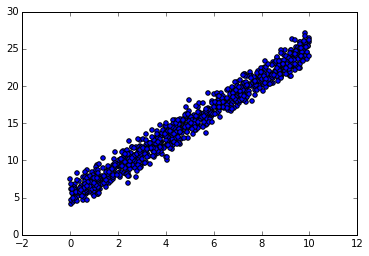

In [26]:
plt.scatter(X,Y)

In [104]:
def loss(theta):
    return -np.sum((Y-(theta[0]*X+theta[1]))**2)

In [105]:
loss((2,5))

-934.32577445239758

In [106]:
gradient = grad(loss)

In [107]:
gradient(np.zeros(2))

array([ 181870.67601732,   29894.94974059])

In [111]:
n=1000
x = np.zeros((n,2))
for i in range(1,n):
    x[i] = x[i-1] + gradient(x[i-1])*0.000001

In [112]:
x[-1]

array([ 2.41886504,  2.24361507])

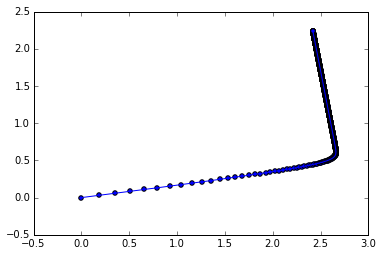

In [113]:
plt.plot(x[:,0],x[:,1])
plt.scatter(x[:,0],x[:,1])

In [446]:
def autocorrelation(X,k=1):
    mu = X.mean(0)
    denom=(len(X)-k)*np.std(X,0)**2
    s = np.sum((X[:-k]-mu)*(X[k:]-mu),0)
    return np.sum(s/denom)
    #return np.sum(s/denom)

In [531]:
def time_lag_corr_cov(X,tau=1):
    #mu = (X[:-tau].mean(0) + X[tau:].mean(0)) / 2
    mu = X.mean(0)
    X_ = X-mu
    M = len(X) - tau
    dim = len(X.T)
    corr = np.zeros((dim,dim))
    cov = np.zeros((dim,dim))
    for i in range(M):
        corr += np.outer(X_[i],X_[i+tau]) + np.outer(X_[i+tau],X_[i])
        cov += np.outer(X_[i],X_[i]) + np.outer(X_[i+tau],X_[i+tau])
    return corr / (2.0*M),cov / (2.0*M)

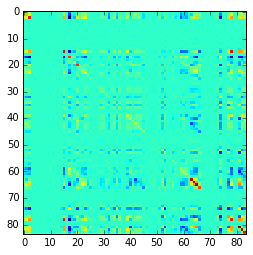

In [536]:
def autocorr(X,tau=1):
    mu = X.mean(0)
    X_ = X-mu
    M = len(X) - tau
    dim = len(X.T)
    corr = np.zeros((dim,dim))
    for i in range(M):
        corr += np.outer(X_[i],X_[i+tau]) + np.outer(X_[i+tau],X_[i])
    return corr / (2.0*M)

c = autocorr(X_dihedral[:10000])
plt.imshow(c,interpolation='none')

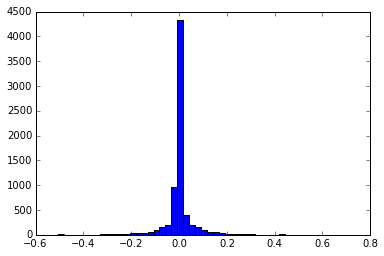

In [549]:
plt.hist(c.reshape(np.prod(c.shape)),bins=50);

In [553]:
for i in range(10):
    print(np.sum(np.abs(autocorr(np.random.randn(1000,84)))))

126.870378741
127.352984372
125.744061127
125.41081678
127.146192582
127.114146144
125.251621406
125.642977222
126.265956242
130.183072033


In [552]:
np.sum(np.abs(autocorr(X_dihedral[:10000])))

200.2648099577363

In [532]:
time_lag_corr_cov(X_dihedral)

(array([[  5.34731614e-02,   1.02479150e-02,   1.09036138e-02, ...,
           8.11111667e-03,   4.65396996e-03,  -5.14005893e-04],
        [  1.02479150e-02,   7.50955461e-02,   1.99509757e-02, ...,
           2.96661861e-03,   1.44088783e-02,   2.91962291e-03],
        [  1.09036138e-02,   1.99509757e-02,   5.60410698e-02, ...,
          -8.87908554e-03,   4.11025273e-03,   5.34145917e-03],
        ..., 
        [  8.11111667e-03,   2.96661861e-03,  -8.87908554e-03, ...,
           2.45416456e-01,   1.27587891e-01,   6.56333443e-02],
        [  4.65396996e-03,   1.44088783e-02,   4.11025273e-03, ...,
           1.27587891e-01,   6.32641612e-01,   2.46835418e-01],
        [ -5.14005893e-04,   2.91962291e-03,   5.34145917e-03, ...,
           6.56333443e-02,   2.46835418e-01,   6.62830222e-01]]),
 array([[  7.21106966e-02,   1.03182610e-02,   1.07774718e-02, ...,
           8.15109420e-03,   4.66923198e-03,  -5.94737988e-04],
        [  1.03182610e-02,   8.68528782e-02,   1.99040486e-0

In [447]:
np.std(X_dihedral,0).shape

(84,)

In [448]:
X_dihedral.mean(0).shape

(84,)

In [507]:
from msmbuilder.example_datasets import AlanineDipeptide,FsPeptide
dataset = FsPeptide().get()
fs_trajectories = dataset.trajectories
from msmbuilder import featurizer
dhf = featurizer.DihedralFeaturizer()
dhft = dhf.fit_transform(fs_trajectories)
X_dihedral = np.vstack(dhft)#[0]

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [508]:
X_dihedral.mean(0).shape

(84,)

In [509]:
X_dihedral.shape

(280000, 84)

In [510]:
autocorrelation(X_dihedral)

68.898237813741176

In [511]:
from sklearn.decomposition import PCA
pca = PCA(2)
autocorrelation(pca.fit_transform(X_dihedral))

1.9735162402530837

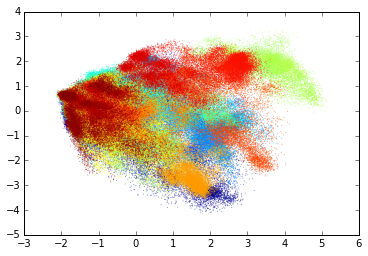

In [513]:
X_ = pca.fit_transform(X_dihedral)
plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=1,
            c=np.arange(len(X_)),alpha=0.5)

In [514]:
A_init = pca.components_.T
A_init.shape

(84, 2)

In [515]:
np.dot(X_dihedral,A_init)

array([[-2.33946753, -0.89564353],
       [-2.60062861, -1.45025086],
       [-2.26692963, -1.53225303],
       ..., 
       [-2.75940418,  1.27710533],
       [-2.97198439,  1.17977309],
       [-3.00106859,  1.19465375]], dtype=float32)

In [518]:
from msmbuilder.decomposition import tICA
tica = tICA(2,10)
X_tica = tica.fit_transform([X_dihedral])[0]
autocorrelation(X_tica)

1.9894663016783958

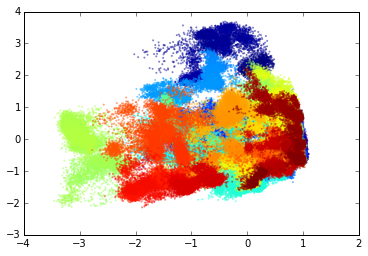

In [519]:
plt.scatter(X_tica[:,0],X_tica[:,1],linewidths=0,s=4,
            c=np.arange(len(X_)),alpha=0.5)

In [520]:
A_init_tica=tica.components_.T

In [521]:
def autocorr_loss(A_vec):
    A = np.reshape(A_vec,A_init.shape)
    X_ = np.dot(X_dihedral,A)
    X_ /= (np.max(X_) - np.min(X_))
    return autocorrelation(X_)

In [522]:
autocorr_loss(A_init_tica.reshape(84*2))

1.9894663016784198

In [523]:
autocorr_grad = grad(autocorr_loss)

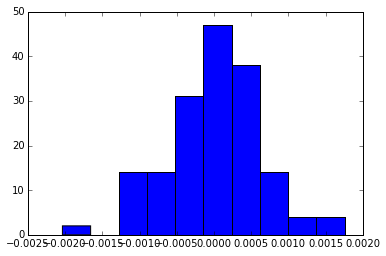

In [524]:
plt.hist(autocorr_grad(A_init_tica.reshape(84*2)));

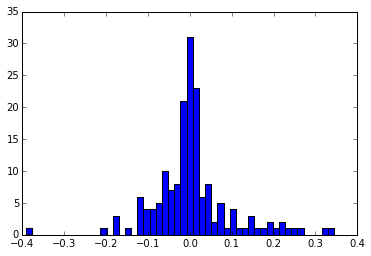

In [525]:
plt.hist(A_init_tica.reshape(84*2),bins=50);

In [411]:
%timeit autocorr_loss(A_init_tica.reshape(84*2))

100 loops, best of 3: 3.34 ms per loop


In [412]:
%timeit autocorr_grad(A_init_tica.reshape(84*2))

100 loops, best of 3: 8.91 ms per loop


In [528]:
n=100
x = np.zeros((n,84*2))
x[0] = A_init_tica.reshape(84*2)
from time import time
t = time()
for i in range(1,n):
    x[i] = x[i-1] + autocorr_grad(x[i-1])*10
    print(i,time()-t)

(1, 1.2756741046905518)
(2, 2.4555060863494873)
(3, 3.682971954345703)
(4, 4.900946140289307)
(5, 6.144735097885132)
(6, 7.42544412612915)
(7, 8.672209978103638)
(8, 9.887005090713501)
(9, 11.1405611038208)
(10, 12.347078084945679)
(11, 13.682538986206055)
(12, 14.987375020980835)
(13, 16.176119089126587)
(14, 17.352954149246216)
(15, 18.535717964172363)
(16, 19.724857091903687)
(17, 20.996942043304443)
(18, 22.221500158309937)
(19, 23.408400058746338)
(20, 24.601027011871338)
(21, 25.814558029174805)
(22, 27.053038120269775)
(23, 28.427603006362915)
(24, 29.96596908569336)
(25, 31.183199167251587)
(26, 32.408610105514526)
(27, 33.67013216018677)
(28, 34.930222034454346)
(29, 36.242202043533325)
(30, 37.65337610244751)
(31, 39.01504707336426)
(32, 40.237180948257446)
(33, 41.50289797782898)
(34, 42.82864999771118)
(35, 44.210366010665894)
(36, 45.44645094871521)
(37, 46.644782066345215)
(38, 47.85747694969177)
(39, 49.06873416900635)
(40, 50.29502606391907)
(41, 51.56689405441284)
(42,

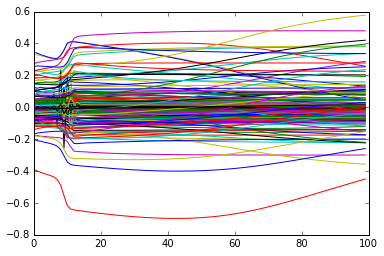

In [560]:
plt.plot(x);


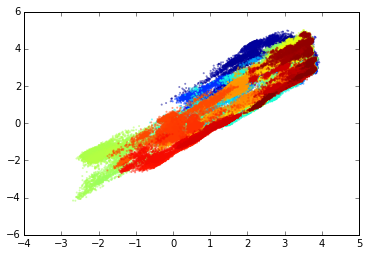

In [530]:
X_ = np.dot(X_dihedral,x[-1].reshape(84,2))
plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=4,
            c=np.arange(len(X_)),alpha=0.5)

In [561]:
X_dihedral.shape

(280000, 84)

In [468]:
for i in range(len(x))[::50]:
    X_ = np.dot(X_dihedral,x[i].reshape(84,2))
    plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=4,
                c=np.arange(len(X_)),alpha=0.5)
    plt.savefig('{0}.jpg'.format(i))
    plt.close()

In [469]:
autocorr_loss(x[-1]),autocorr_loss(A_init_tica),autocorr_loss(A_init)

(1.9957626524900636, 1.9947409358638186, 1.9879298)

In [478]:
def autocorr_loss_mult(A_vec):
    A = np.reshape(A_vec,A_init.shape)
    X_ = np.dot(X_dihedral,A)
    return autocorrelation(X_,1) + autocorrelation(X_,10)
    #s = 0
    #for i in range(10):
    #    s += autocorrelation(X_,1+2*i)
    return autocorrelation(X_)

In [479]:
autocorrelation(X_dihedral,10)

41.089905

In [480]:
autocorr_grad_mult = grad(autocorr_loss_mult)

In [482]:
autocorr_loss_mult(np.ones(84*2))

3.699189352176437

In [481]:
autocorr_grad_mult(np.ones(84*2)).shape

(168,)

In [486]:
n=1000
x = np.zeros((n,84*2))
x[0] = A_init_tica.reshape(84*2)
for i in range(1,n):
    x[i] = x[i-1] + autocorr_grad_mult(x[i-1])

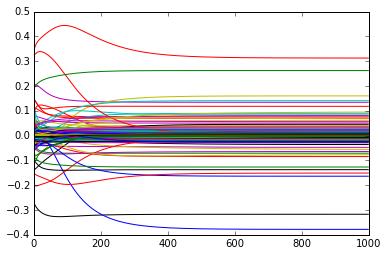

In [487]:
plt.plot(x);

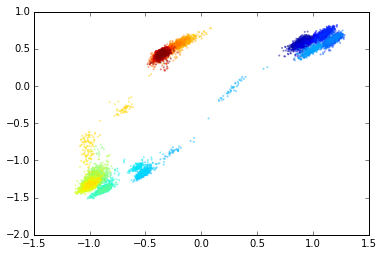

In [495]:
X_ = np.dot(X_dihedral,x[100].reshape(84,2))
plt.scatter(X_[:,0],X_[:,1],linewidths=0,s=4,
            c=np.arange(len(X_)),alpha=0.5)

In [490]:
l = [autocorr_loss_mult(x_) for x_ in x]

In [492]:
l

[3.983951859123092,
 3.9848932702859257,
 3.985466113536182,
 3.9858801974996774,
 3.9862011907840609,
 3.9864601126246266,
 3.9866738546013094,
 3.9868528480077798,
 3.987004245465696,
 3.9871333201369783,
 3.9872441386594453,
 3.9873399223710315,
 3.9874232638548541,
 3.987496269852536,
 3.9875606629225597,
 3.9876178576971721,
 3.9876690200880787,
 3.9877151142009217,
 3.9877569399218502,
 3.9877951631895989,
 3.9878303404315019,
 3.9878629383059478,
 3.9878933496632669,
 3.9879219064618665,
 3.9879488902367859,
 3.9879745406029885,
 3.9879990621826877,
 3.9880226302667166,
 3.9880453954587263,
 3.9880674874991642,
 3.9880890184260385,
 3.9881100851973712,
 3.9881307718747068,
 3.9881511514472718,
 3.9881712873608368,
 3.9881912348026916,
 3.9882110417847478,
 3.9882307500587504,
 3.988250395891777,
 3.988270010724805,
 3.9882896217337058,
 3.9883092523082113,
 3.9883289224622871,
 3.9883486491867677,
 3.9883684467537952,
 3.9883883269803859,
 3.988408299457975,
 3.9884283717536224,

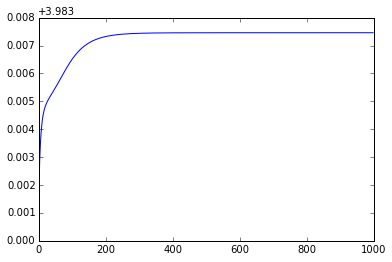

In [491]:
plt.plot(l)

In [ ]:
# idea: tICA requires the specification of 
# a single autocorrelation time-- can we consider multiple?